# The Usage of DarKnight

#### First of all, let's import all the modules we need(See below) 

In [2]:
import math
import sys
sys.path.append('../darknight/')
import fcts
import numpy as np
import pandas as pd
import darkchem
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import PandasTools,Draw
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import SVG, display
%config InlineBackend.figure_format = 'retina'

Using TensorFlow backend.


#### Then we have to load the model and path vectors to help us predict chemical reactions behind
The model's role is tranforming reactant smiles string to its correlative vector in the latent space created by darkchem package.  
As for path vectors, their function is to connect the reactant vector to its corresponding prodcut vector in the latent space.

In [7]:
#load model
model = darkchem.utils.load_model('../Final Trained DarkChem Network Weights/N7b_[M+H]')
#load path vectors
PathB = np.load('Benzene_PathVec.npy')
PathN = np.load('Nring_PathVec.npy')

#### Predict Aromatic Hydrocarbons(contain one benzene) Reduction type chemical reaction
Predict a single reaction

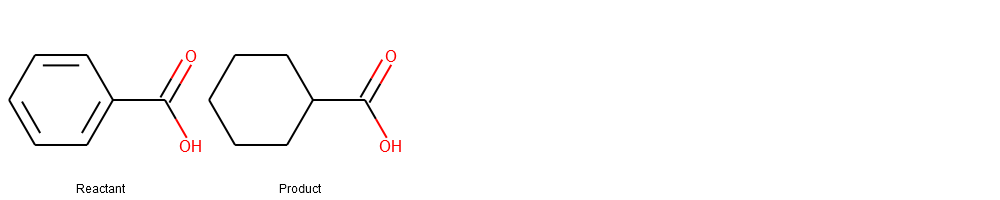

,Reactant,Product
0,O=C(O)c1ccccc1,O=C(O)C1CCCCC1


In [8]:
smi = 'O=C(O)c1ccccc1'
fcts.output_single(smi,model,PathB)

Predict multiple reactions at one time

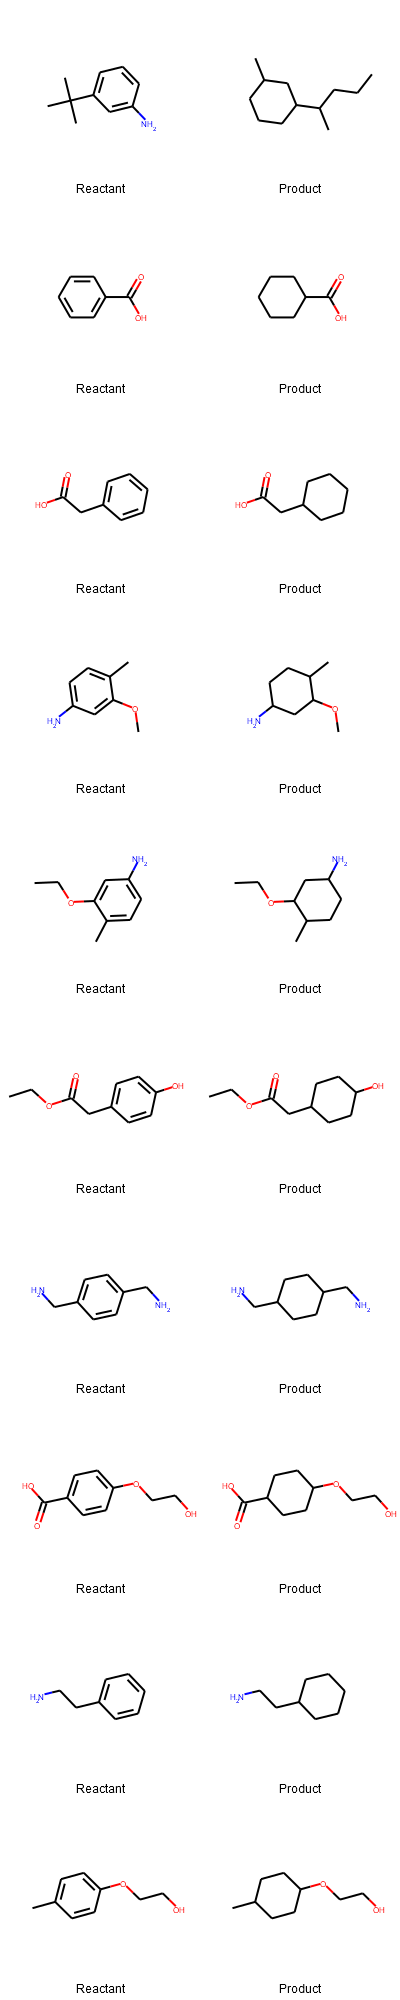

,Reactants,Products
0,CC(C)(C)c1cccc(N)c1,CCCC(C)C1CCCC(C)C1
1,O=C(O)c1ccccc1,O=C(O)C1CCCCC1
2,O=C(O)Cc1ccccc1,O=C(O)CC1CCCCC1
3,COc1cc(N)ccc1C,COC1CC(N)CCC1C
4,CCOc1cc(N)ccc1C,CCOC1CC(N)CCC1C
5,CCOC(=O)Cc1ccc(O)cc1,CCOC(=O)CC1CCC(O)CC1
6,NCc1ccc(CN)cc1,NCC1CCC(CN)CC1
7,O=C(O)c1ccc(OCCO)cc1,O=C(O)C1CCC(OCCO)CC1
8,NCCc1ccccc1,NCCC1CCCCC1
9,Cc1ccc(OCCO)cc1,CC1CCC(OCCO)CC1


In [9]:
data = pd.read_csv('Aromatic_Hydrocarbon_test_md.csv')
fcts.output_multiple(data,model,PathB)

From the results showed above, we can know that there are only 1 chemical reaction is predicted wrong, that's because the reactant is a little different from the other 9 reactants(look at its branches). In latent space, the same type of chemicals will be gathered together, while different type compounds will be distributed away. So it's normal why the first prediction is not correct.

#### Predict Pyridine Derivative Reduction type chemical reaction
Predict a single reaction

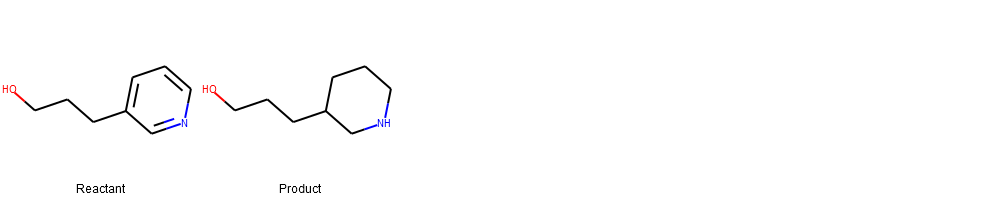

,Reactant,Product
0,OCCCc1cccnc1,OCCCC1CCCNC1


In [10]:
smi = 'OCCCc1cccnc1'
fcts.output_single(smi,model,PathN)

Predict multiple reactions at one time

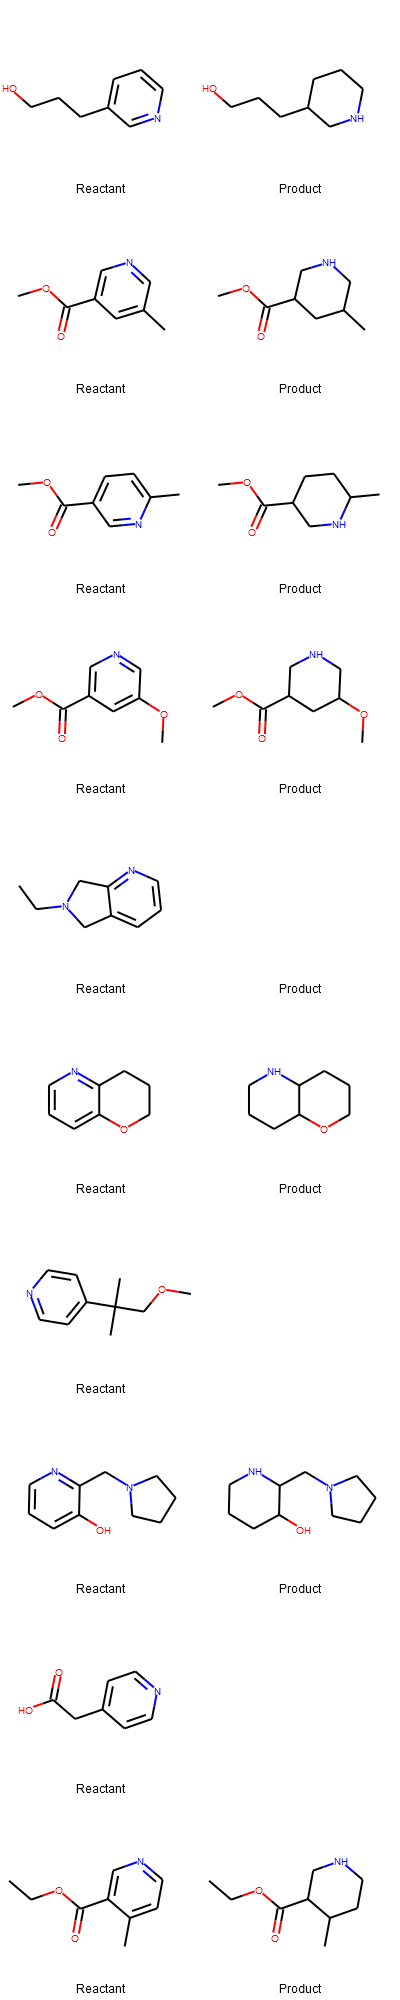

,Reactants,Products
0,OCCCc1cccnc1,OCCCC1CCCNC1
1,COC(=O)c1cncc(C)c1,COC(=O)C1[CH]N[CH]C(C)C1
2,COC(=O)c1ccc(C)nc1,COC(=O)C1CCC(C)NC1
3,COC(=O)c1cncc(OC)c1,COC(=O)C1[CH]N[CH]C(OC)C1
4,CCN1Cc2cccnc2C1,
5,c1cnc2c(c1)OCCC2,C1CNC2C(C1)OCCC2
6,COCC(C)(C)c1ccncc1,COCCCC(C)C1C[CH]N[CH2]=[CH2]1
7,Oc1cccnc1CN1CCCC1,OC1CCCNC1CN1CCCC1
8,O=C(O)Cc1ccncc1,O=COCCC1C[CH]N[CH2]=[CH2]1
9,CCOC(=O)c1cnccc1C,CCOC(=O)C1CNCCC1C


In [12]:
data = pd.read_csv('N_ring_test.csv')
fcts.output_multiple(data,model,PathB)

For this type reaction, there are 3 bad predictions in the total 10 reactions. As mentioned before, some of them maybe not belong to the same type chemicals, another reason may result from the limited training set for the calculation of path vector.